In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
###################################
##### DATOS ENTRADA CASO 03 #######
###################################
##Radio
RADIO = 0.10
##Tamaño
LADO_CUBO = 0.25
#Rho
RHO=100/(4/3*math.pi*RADIO**3)
epsi_0= 1
#Numero de pasos
#nPasosX nPasosY: Cantidad de espacios que se deja para cada eje.
n=18 # nPasosX
m=18 # nPasosY
o=18 # nPasosZ
nPasosX=n
nPasosY=m
nPasosZ=o

In [3]:
#Tamaño de Pasos
pasoX=(LADO_CUBO)/nPasosX
pasoY=(LADO_CUBO)/nPasosY
pasoZ=(LADO_CUBO)/nPasosZ
print(pasoX)
print(pasoY)
print(pasoZ)
print(RHO)

0.013888888888888888
0.013888888888888888
0.013888888888888888
23873.2414637843


In [4]:
##INICIALIZAMOS EL ARRAY 
#calcArray: Array donde guardamos los valores F(x,y) de los puntos discretos.
calcArray = np.zeros((nPasosZ+1,nPasosY+1,nPasosX+1))
#calcArray

In [5]:
#boolArray: Array donde guardamaos que puntos discretos ya tenemos conocidos.
boolArray = np.full((nPasosZ+1,nPasosY+1,nPasosX+1),False)
#boolArray

In [6]:
#CONFIGURACION INICIAL DE LA PLACA
#SETEAMOS LOS BORDES
for k in range(0,nPasosZ+1):
    for j in range(0,nPasosY+1):
        calcArray[k][j][0]=0
        calcArray[k][j][nPasosX]=0
        boolArray[k][j][0]=True
        boolArray[k][j][nPasosX]=True
for k in range(0,nPasosZ+1):
    for i in range(0,nPasosX+1):
        calcArray[k][0][i]=0
        calcArray[k][nPasosY][i]=0
        boolArray[k][0][i]=True
        boolArray[k][nPasosY][i]=True
for j in range(0,nPasosY+1):
    for i in range(0,nPasosX+1):
        calcArray[0][j][i]=0
        calcArray[nPasosZ][j][i]=0
        boolArray[0][j][i]=True
        boolArray[nPasosZ][j][i]=True
#calcArray


In [7]:
ubicacionArrayX = np.full((nPasosZ+1,nPasosY+1,nPasosX+1),-1.0)
ubicacionArrayY = np.full((nPasosZ+1,nPasosY+1,nPasosX+1),-1.0)
ubicacionArrayZ = np.full((nPasosZ+1,nPasosY+1,nPasosX+1),-1.0)
centroX=LADO_CUBO/2
centroY=LADO_CUBO/2
centroZ=LADO_CUBO/2
for k in range(0,nPasosZ+1):
    for j in range(0,nPasosY+1):
        for i in range(0,nPasosX+1):
            ubicacionArrayX[k][j][i]=i*pasoX-LADO_CUBO/2
            ubicacionArrayY[k][j][i]=j*pasoY-LADO_CUBO/2
            ubicacionArrayZ[k][j][i]=k*pasoZ-LADO_CUBO/2
            contador=1
#indicesArray

In [8]:
##indicesArray: Array que contendrá los indices para la recolocacion de los valores. Para Ploteo
indicesArray = np.full((nPasosZ+1,nPasosY+1,nPasosX+1),-1)
contador = 0
for k in range(1,nPasosZ):
    for j in range(1,nPasosY):
        for i in range(1,nPasosX):
            auxRadio = math.sqrt(ubicacionArrayX[k][j][i]**2+ubicacionArrayY[k][j][i]**2+ubicacionArrayZ[k][j][i]**2)
            if((RADIO-auxRadio)>=pasoX) :
                indicesArray[k][j][i]=contador
                contador+=1
#print(contador)
#print(indicesArray)

In [9]:
## Definicion de funcion de Carga para Poisson (Aun no funcional)
def cargaDistribucion(x,y,z):
    return RHO
    if(math.sqrt(x**2+y**2+z**2)<=RADIO):
        return RHO
    return 0

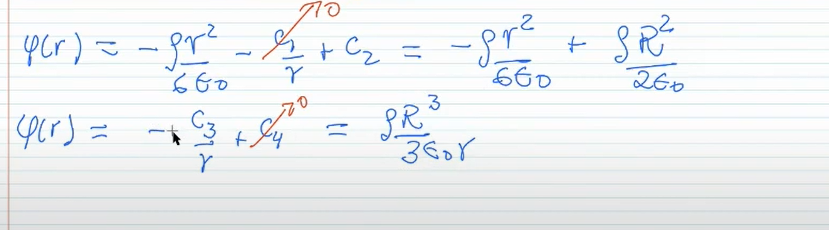

In [10]:
_radioArray = np.full((nPasosZ+1,nPasosY+1,nPasosX+1),-1)
nVariables=0
for k in range(0,nPasosZ+1):
    for j in range(0,nPasosY+1):
        for i in range(0,nPasosX+1):
            _radioArray[k][j][i]=math.sqrt(ubicacionArrayX[k][j][i]**2+ubicacionArrayY[k][j][i]**2+ubicacionArrayZ[k][j][i]**2)
            #_radioArray[k][j][i]=cargaDistribucion(ubicacionArrayX[k][j][i],ubicacionArrayY[k][j][i],ubicacionArrayZ[k][j][i])
            auxRadio = math.sqrt(ubicacionArrayX[k][j][i]**2+ubicacionArrayY[k][j][i]**2+ubicacionArrayZ[k][j][i]**2)
            if((RADIO-auxRadio)<pasoX) :
                if (RADIO>=auxRadio):
                    calcArray[k][j][i]=RHO*(RADIO**2)/2
                else:
                    calcArray[k][j][i]=0
                boolArray[k][j][i]=True
            else:
                nVariables+=1   
#print(boolArray)
#print(_radioArray) 
#print(calcArray)  
#print(nVariables)   

El fin del método es obtener un sistema de ecuaciones, el cual será resuelto utilizando matrices, para apoyranos con la librería de numpy.

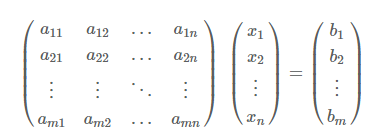

In [11]:
##Inicializando coefArray
#coefArray: Array donde se contendrá los Coeficientes para el sistema de Ecuaciones
#nVariables= (nPasosX-1)*(nPasosY-1)*(nPasosZ-1)
coefArray= np.zeros((nVariables,nVariables))
#coefArray

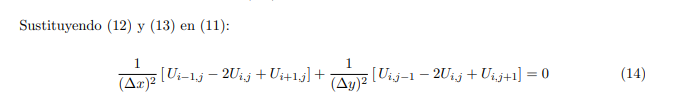

In [12]:
##Inicializando indepArray
#indepArray Array donde se contendrá los terminos independientes para el sistema de Ecuaciones
indepArray = np.zeros((nVariables,1))

print(nVariables)


1021


In [13]:
##METODO ITERATIVO 

_pasoX2=1/(pasoX*pasoX)
_pasoY2=1/(pasoY*pasoY)
_pasoZ2=1/(pasoZ*pasoZ)
contador=0
#print(_pasoX2)
for k in range(1,nPasosZ):
    for j in range(1,nPasosY):
        for i in range(1,nPasosX):
            if(boolArray[k][j][i]):
                continue
            #print('\nCONTADOR: '+str(contador))
            _indep=0
            #i-1      
            if(boolArray[k][j][i-1]):
                _indep+=calcArray[k][j][i-1]*_pasoX2
            else:
                coefArray[contador][indicesArray[k][j][i-1]]=1*_pasoX2
            #i+1 
            if(boolArray[k][j][i+1]):
                _indep+=calcArray[k][j][i+1]*_pasoX2
            else:
                coefArray[contador][indicesArray[k][j][i+1]]=1*_pasoX2
            #j-1      
            if(boolArray[k][j-1][i]):
                _indep+=calcArray[k][j-1][i]*_pasoY2
            else:
                coefArray[contador][indicesArray[k][j-1][i]]=1*_pasoY2
            #j+1 
            if(boolArray[k][j+1][i]):
                _indep+=calcArray[k][j+1][i]*_pasoY2
            else:
                coefArray[contador][indicesArray[k][j+1][i]]=1*_pasoY2
            #k-1      
            if(boolArray[k-1][j][i]):
                _indep+=calcArray[k-1][j][i]*_pasoZ2
            else:
                coefArray[contador][indicesArray[k-1][j][i]]=1*_pasoZ2
            #j+1 
            if(boolArray[k+1][j][i]):
                _indep+=calcArray[k+1][j][i]*_pasoZ2
            else:
                coefArray[contador][indicesArray[k+1][j][i]]=1*_pasoZ2    
            #ij
            coefArray[contador][indicesArray[k][j][i]]=(-2)*_pasoZ2+(-2)*_pasoY2+(-2)*_pasoX2
            
            indepArray[contador][0] = -cargaDistribucion(ubicacionArrayX[k][j][i],ubicacionArrayY[k][j][i],ubicacionArrayZ[k][j][i])
            indepArray[contador][0] -=_indep
            #print('\nSIST ECUACION:'+str(coefArray[contador]))
            #print('\nCoef Indp:'+str(indepArray[contador][0]))
            contador+=1
print(coefArray*pasoX*pasoX) #Array de coeficientes para sist de ecuaciones
print(indepArray*pasoX*pasoX)

##FALTA ARREGLAR PARA POISSON



[[-6.  1.  0. ...  0.  0.  0.]
 [ 1. -6.  1. ...  0.  0.  0.]
 [ 0.  1. -6. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -6.  1.  0.]
 [ 0.  0.  0. ...  1. -6.  1.]
 [ 0.  0.  0. ...  0.  1. -6.]]
[[-362.70379971]
 [-243.33759239]
 [-362.70379971]
 ...
 [-362.70379971]
 [-243.33759239]
 [-362.70379971]]


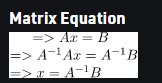

In [14]:
#Inversa de Array Coeficientes
coefArrayInv=np.linalg.inv(coefArray)
coefArrayInv


array([[-3.60396034e-05, -7.46286409e-06, -1.66717628e-06, ...,
        -3.40171133e-09, -4.09375145e-09, -3.29141047e-09],
       [-7.46286409e-06, -3.75785532e-05, -7.46286409e-06, ...,
        -4.09375145e-09, -5.00893086e-09, -4.09375145e-09],
       [-1.66717628e-06, -7.46286409e-06, -3.60396034e-05, ...,
        -3.29141047e-09, -4.09375145e-09, -3.40171133e-09],
       ...,
       [-3.40171133e-09, -4.09375145e-09, -3.29141047e-09, ...,
        -3.60396034e-05, -7.46286409e-06, -1.66717628e-06],
       [-4.09375145e-09, -5.00893086e-09, -4.09375145e-09, ...,
        -7.46286409e-06, -3.75785532e-05, -7.46286409e-06],
       [-3.29141047e-09, -4.09375145e-09, -3.40171133e-09, ...,
        -1.66717628e-06, -7.46286409e-06, -3.60396034e-05]])

In [15]:

incogArray=np.matmul(coefArrayInv,indepArray)
#incogArray = incogArray[nVariables-1]
incogArray


array([[124.14407634],
       [125.12394873],
       [124.14407634],
       ...,
       [124.14407634],
       [125.12394873],
       [124.14407634]])

In [16]:
calcArray2 = np.copy(calcArray)
print(incogArray.shape)
for k in range(1,nPasosZ):
    for j in range(1,nPasosY):
        for i in range(1,nPasosX):
            pass
            if(not boolArray[k][j][i]):
                calcArray2[k][j][i]=incogArray[indicesArray[k][j][i]]


(1021, 1)


In [17]:
#PLOTEO ?
'''
for k in range(0,nPasosZ+1):
    for j in range(0,nPasosY+1):
        for i in range(0,nPasosX+1):
            print("{:20.4f}".format(calcArray2[k][j][i]), end =' ')
        print("\n")
    print("\n")
'''

'\nfor k in range(0,nPasosZ+1):\n    for j in range(0,nPasosY+1):\n        for i in range(0,nPasosX+1):\n            print("{:20.4f}".format(calcArray2[k][j][i]), end =\' \')\n        print("\n")\n    print("\n")\n'

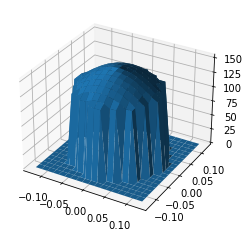

In [18]:


fig = plt.figure()
ax = plt.axes(projection = "3d")

x = np.linspace(-LADO_CUBO/2,+LADO_CUBO/2,nPasosX+1)
y = np.linspace(-LADO_CUBO/2,+LADO_CUBO/2,nPasosY+1)

X, Y = np.meshgrid(x, y)
#print(calcArray2[nPasosZ//2])
ax.plot_surface(X, Y, calcArray2[nPasosZ//2])
plt.show()

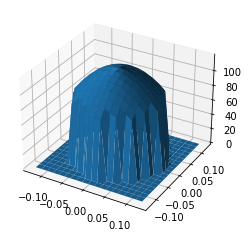

In [19]:
def solucionAnalitica(x,y,z):
    _radio= math.sqrt(x**2+y**2+z**2)
    if(_radio<=RADIO):
        return (-RHO*(_radio**2)/6)+(RHO*(RADIO**2)/2)
    else:
        return 0
        #return (RHO*(RADIO**3))/(3*_radio)
calcArrayAnal = np.zeros((nPasosZ+1,nPasosY+1,nPasosX+1))
for k in range(1,nPasosZ):
    for j in range(1,nPasosY):
        for i in range(1,nPasosX):
            calcArrayAnal[k][j][i]=solucionAnalitica(ubicacionArrayX[k][j][i],ubicacionArrayY[k][j][i],ubicacionArrayZ[k][j][i])

#print(calcArrayAnal[nPasosZ//2])

fig = plt.figure()
ax = plt.axes(projection = "3d")

x = np.linspace(-LADO_CUBO/2,+LADO_CUBO/2,nPasosX+1)
y = np.linspace(-LADO_CUBO/2,+LADO_CUBO/2,nPasosY+1)

X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, calcArrayAnal[nPasosZ//2])
plt.show()

In [20]:
print(calcArrayAnal[nPasosZ//2][nPasosY//2]-calcArray2[nPasosZ//2][nPasosY//2])

[  0.           0.         -37.60895164 -34.62863906 -33.53753256
 -33.22163483 -33.1365295  -33.11562617 -33.11235896 -33.11235896
 -33.11235896 -33.11562617 -33.1365295  -33.22163483 -33.53753256
 -34.62863906 -37.60895164   0.           0.        ]
